In [1]:
import pandas as pd

df_players = pd.read_parquet("./data/13335/players.parquet")

In [2]:
df_players.columns

Index(['elapsed_seconds', 'frame_id', 'match_id', 'period', 'shirt', 'x', 'y',
       'team', 'ball_x', 'ball_y', 'ball_z', 'ball_vx', 'ball_vy', 'ball_vz',
       'ball_speed', 'ball_ax', 'ball_ay', 'ball_az', 'vx', 'vy', 'ax', 'ay',
       'speed'],
      dtype='object')

In [19]:
df = df_players[["frame_id", "period", "shirt", "team", "x", "y", "vx", "vy", "ball_x", "ball_y", "elapsed_seconds"]]

df["frame_id"] = pd.to_numeric(df["frame_id"])


/tmp/ipykernel_20118/2060177292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["frame_id"] = pd.to_numeric(df["frame_id"])


In [20]:
df = df.sort_values(by=["frame_id", "team", "shirt"]).reset_index(drop=True)

In [23]:
df[df["frame_id"] > 2000].head(22)

,frame_id,period,shirt,team,x,y,vx,vy,ball_x,ball_y,elapsed_seconds
217536,2291,1,6,away,-5.846,-3.174,-0.340328,-0.883955,-44.53,-13.7,69.10211
217537,2291,1,7,away,6.317,17.130,0.464936,-0.177416,-44.53,-13.7,69.10211
217538,2291,1,10,away,-10.956,12.305,-0.009856,-0.488335,-44.53,-13.7,69.10211
217539,2291,1,11,away,-23.304,1.304,-0.866486,-0.731781,-44.53,-13.7,69.10211
217540,2291,1,15,away,6.294,-13.861,0.056414,-0.705898,-44.53,-13.7,69.10211
217541,2291,1,21,away,-11.581,-16.772,-0.520949,0.112588,-44.53,-13.7,69.10211
217542,2291,1,22,away,-0.270,9.520,0.248655,-0.626886,-44.53,-13.7,69.10211
217543,2291,1,26,away,35.012,0.202,-0.124127,-0.144882,-44.53,-13.7,69.10211
217544,2291,1,27,away,-21.831,17.976,-1.195274,-0.426792,-44.53,-13.7,69.10211
217545,2291,1,30,away,7.949,8.151,-0.260675,-0.374545,-44.53,-13.7,69.10211


In [ ]:
FIELD_WIDTH = 120
FIELD_HEIGHT = 80

GRID_X = 12
GRID_Y = 8

In [ ]:
import numpy as np

# Inicializa com valores heurísticos simples
epv_grid = np.zeros((GRID_X, GRID_Y))
for x in range(GRID_X):
    for y in range(GRID_Y):
        # Valor cresce conforme nos aproximamos do gol adversário
        epv_grid[x, y] = x / GRID_X

In [ ]:
def transition_probability(player_pos, teammates_pos, opponents_pos):
    """
    Exemplo simplificado: calcula probabilidade de passe baseado na distância e desmarcação.
    """
    prob_map = np.zeros((GRID_X, GRID_Y))
    for mate in teammates_pos:
        grid_x = int(mate[0] / FIELD_WIDTH * GRID_X)
        grid_y = int(mate[1] / FIELD_HEIGHT * GRID_Y)
        dist = np.linalg.norm(np.array(player_pos) - np.array(mate))
        open_space = np.min([np.linalg.norm(np.array(mate) - np.array(op)) for op in opponents_pos])
        prob_map[grid_x, grid_y] += np.exp(-dist / 20) * (open_space / 10)
    return prob_map / prob_map.sum()

In [ ]:
def compute_epv(player_pos, teammates_pos, opponents_pos, epv_grid):
    prob_map = transition_probability(player_pos, teammates_pos, opponents_pos)
    return np.sum(prob_map * epv_grid)

In [ ]:
epv_series = []
for _, frame in df_players.iterrows():
    player_pos = get_ball_holder_position(frame)
    teammates_pos = get_teammates_positions(frame)
    opponents_pos = get_opponents_positions(frame)

    epv_value = compute_epv(player_pos, teammates_pos, opponents_pos, epv_grid)
    epv_series.append(epv_value)

In [21]:
import pandas as pd
import numpy as np

# Carrega o DataFrame do tracking
# df = pd.read_csv('seu_arquivo.csv')  # Se estiver lendo de arquivo

# Selecionar apenas um frame para exemplo (aplicar em loop depois)
frame = df[df['frame_id'] == 2291]  # ou qualquer frame que deseje

# Configurações do campo
FIELD_LENGTH = 105  # metros
FIELD_WIDTH = 68    # metros

# Criar grade (mapa EPV)
x_bins = np.linspace(-FIELD_LENGTH/2, FIELD_LENGTH/2, 50)
y_bins = np.linspace(-FIELD_WIDTH/2, FIELD_WIDTH/2, 32)
epv_grid = np.zeros((len(x_bins), len(y_bins)))

# Função de influência gaussiana simples
def influence(xp, yp, x, y, vx=0, vy=0, sigma_long=8, sigma_lat=4):
    # Direção do jogador
    norm = np.hypot(vx, vy)
    if norm < 1e-3:
        theta = 0  # parado
    else:
        theta = np.arctan2(vy, vx)

    # Coordenadas relativas
    dx = x - xp
    dy = y - yp

    # Rotacionar coordenadas para o referencial do jogador
    dx_rot = dx * np.cos(theta) + dy * np.sin(theta)
    dy_rot = -dx * np.sin(theta) + dy * np.cos(theta)

    # Influência elíptica
    exponent = -((dx_rot**2) / (2 * sigma_long**2) + (dy_rot**2) / (2 * sigma_lat**2))
    return np.exp(exponent)


# Obter posições dos jogadores
home_players = frame[frame['team'] == 'home'][['x', 'y']].values
away_players = frame[frame['team'] == 'away'][['x', 'y']].values

# Simular influência e gerar mapa de controle
for i, x in enumerate(x_bins):
    for j, y in enumerate(y_bins):
        home_inf = sum([
            influence(px, py, x, y, vx, vy)
            for px, py, vx, vy in frame[frame['team'] == 'home'][['x', 'y', 'vx', 'vy']].values
        ])
        away_inf = sum([
            influence(px, py, x, y, vx, vy)
            for px, py, vx, vy in frame[frame['team'] == 'away'][['x', 'y', 'vx', 'vy']].values
        ])
        control = home_inf / (home_inf + away_inf + 1e-6)
        epv_grid[i, j] = control

# Para mostrar o valor da posição da bola atual:
ball = frame.iloc[0][['x', 'y']]  # assume que a bola está no mesmo lugar que um jogador, ajustar se necessário
ball_x, ball_y = ball['x'], ball['y']

# Encontrar os índices mais próximos na grade
ix = np.argmin(np.abs(x_bins - ball_x))
iy = np.argmin(np.abs(y_bins - ball_y))

# Valor EPV atual
current_epv = epv_grid[ix, iy]
print(f"EPV no frame {int(frame['frame_id'].iloc[0])}: {current_epv:.3f}")


EPV no frame 2291: 0.355


In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle

def draw_pitch(ax=None, field_color='white', line_color='black', lw=2):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    # Dimensões
    pitch_length = 105
    pitch_width = 68

    # Campo principal
    ax.add_patch(Rectangle((-pitch_length/2, -pitch_width/2), pitch_length, pitch_width,
                           edgecolor=line_color, facecolor=field_color, lw=lw))

    # Meia lua
    ax.add_patch(Arc((0, 0), 18.3, 18.3, angle=0, theta1=0, theta2=360, color=line_color, lw=lw))

    # Meia cancha
    ax.plot([0, 0], [-pitch_width/2, pitch_width/2], color=line_color, lw=lw)

    # Gol e área
    for x in [-pitch_length/2, pitch_length/2]:
        sign = 1 if x > 0 else -1
        # Gol
        ax.add_patch(Rectangle((x, -7.32/2), sign * 2.44, 7.32, edgecolor=line_color, lw=lw, facecolor='none'))
        # Pequena área
        ax.add_patch(Rectangle((x - sign*5.5, -5.5), sign*5.5, 11, edgecolor=line_color, lw=lw, facecolor='none'))
        # Grande área
        ax.add_patch(Rectangle((x - sign*16.5, -16.5), sign*16.5, 33, edgecolor=line_color, lw=lw, facecolor='none'))

    ax.set_xlim(-pitch_length/2, pitch_length/2)
    ax.set_ylim(-pitch_width/2, pitch_width/2)
    ax.set_aspect('equal')
    ax.axis('off')
    return ax


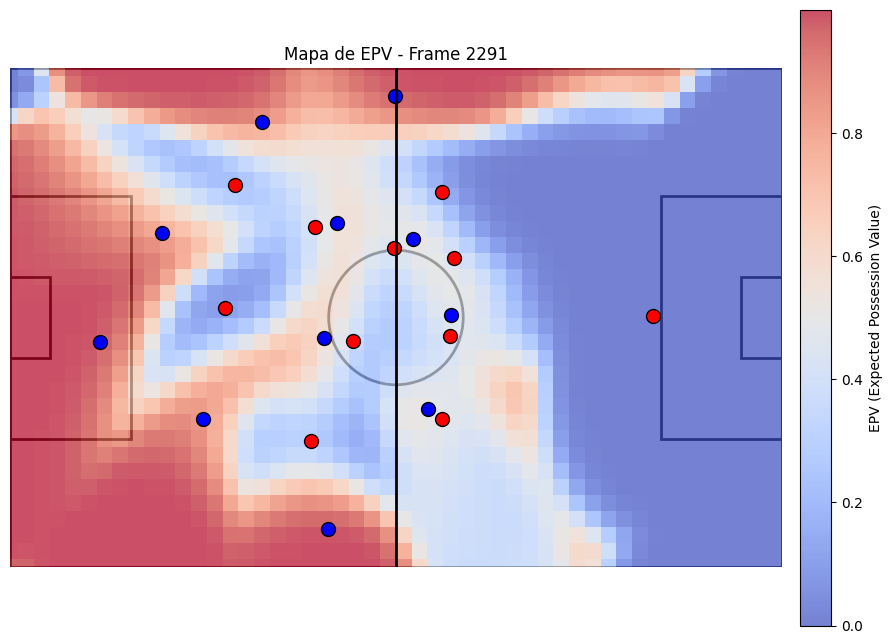

In [22]:
import matplotlib.pyplot as plt
# Criar meshgrid para plotagem
X, Y = np.meshgrid(x_bins, y_bins)
Z = epv_grid.T  # precisa transpor para alinhar corretamente

fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

# Plotar o mapa de calor do EPV
heatmap = ax.pcolormesh(X, Y, Z, shading='auto', cmap='coolwarm', alpha=0.7)

# --- Plotar jogadores ---
ax.scatter(away_players[:, 0], away_players[:, 1], c='red', edgecolors='black', label='Away', s=100)
ax.scatter(home_players[:, 0], home_players[:, 1], c='blue', edgecolors='black', label='Home', s=100)

# Barra de cor
cbar = plt.colorbar(heatmap, ax=ax, pad=0.02)
cbar.set_label('EPV (Expected Possession Value)')

plt.title(f"Mapa de EPV - Frame {int(frame['frame_id'].iloc[0])}")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros do modelo
MAX_PLAYER_SPEED = 7.0  # m/s (aprox. velocidade máxima de um jogador)
GAMMA = 4.0             # inclinação da função logística

# Campo padrão (medidas aproximadas em metros)
FIELD_LENGTH = 105
FIELD_WIDTH = 68

# Função para calcular tempo de chegada de um jogador a um ponto
def time_to_reach(player_pos, target_pos, max_speed=MAX_PLAYER_SPEED):
    dist = np.linalg.norm(player_pos - target_pos, axis=-1)
    return dist / max_speed

# Função logística para modelar controle
def logistic_function(t, t_min, gamma=GAMMA):
    return 1 / (1 + np.exp(gamma * (t - t_min)))

# Função principal para calcular pitch control em uma grade
def calculate_pitch_control(df, grid_x, grid_y):

    # Extraindo posições e times dos jogadores
    positions = df[['x', 'y']].values
    teams = df['team'].values

    # Criar grid de pontos (N, 2)
    X, Y = np.meshgrid(grid_x, grid_y)
    points = np.stack([X.ravel(), Y.ravel()], axis=-1)  # shape (num_points, 2)

    # Calculando tempo para cada jogador chegar em cada ponto
    # positions shape: (num_players, 2)
    # points shape: (num_points, 2)
    # Vamos expandir para broadcast: distances shape (num_points, num_players)
    distances = np.linalg.norm(points[:, None, :] - positions[None, :, :], axis=2)
    times = distances / MAX_PLAYER_SPEED

    # Para cada ponto, achar o menor tempo de chegada (t_min)
    t_min = np.min(times, axis=1, keepdims=True)  # shape (num_points, 1)

    # Aplicar função logística para todos os jogadores e pontos
    probabilities = 1 / (1 + np.exp(GAMMA * (times - t_min)))

    # Separar times
    is_home = (teams == 'home')
    is_away = (teams == 'away')

    # Somar probabilidades por time (shape (num_points,))
    pc_home = np.sum(probabilities[:, is_home], axis=1)
    pc_away = np.sum(probabilities[:, is_away], axis=1)

    # Normalizar pitch control do home time (entre 0 e 1)
    pitch_control_home = pc_home / (pc_home + pc_away + 1e-6)  # para evitar divisão por zero

    # Retornar em formato grade
    return pitch_control_home.reshape(len(grid_y), len(grid_x))

# --- Grade do campo para avaliação (exemplo: 105x68 metros, passo 2m) ---
grid_x = np.arange(-52.5, 52.5, 2)
grid_y = np.arange(-34, 34, 2)

pitch_control = calculate_pitch_control(df[df["frame_id"] == 2291], grid_x, grid_y)

# --- Plot ---
%matplotlib inline
plt.figure(figsize=(12, 7))
plt.imshow(
    pitch_control,
    extent=[grid_x[0], grid_x[-1], grid_y[0], grid_y[-1]],
    origin='lower',
    cmap='bwr',  # azul para away, vermelho para home
    alpha=0.7
)
plt.colorbar(label='Pitch Control (Home Team Probability)')
plt.scatter(df[df['team']=='home']['x'], df[df['team']=='home']['y'], c='red', label='Home Players')
plt.scatter(df[df['team']=='away']['x'], df[df['team']=='away']['y'], c='blue', label='Away Players')
plt.scatter(df['ball_x'].iloc[0], df['ball_y'].iloc[0], c='green', s=150, label='Ball', marker='*')
plt.title('Pitch Control Map')
plt.xlabel('Field X (meters)')
plt.ylabel('Field Y (meters)')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 